## F1

Iteration 0 | value Function: 0.12406450101387519
Iteration 1 | value Function: 0.12306635938579488
Iteration 2 | value Function: 0.12290422160626209
Iteration 3 | value Function: 0.12265298165785375
Iteration 4 | value Function: 0.12251004678801222
Iteration 5 | value Function: 0.043698906114385434
Iteration 6 | value Function: 0.006250210712090632
Iteration 7 | value Function: 0.0025321548267997302
Iteration 8 | value Function: 0.0024447014072813814
Iteration 9 | value Function: 0.002439447692184026
Iteration 10 | value Function: 0.0024352674398521595
Iteration 11 | value Function: 0.002429612179589937
Iteration 12 | value Function: 0.002425701727505996
Iteration 13 | value Function: 0.002420767201853498
Iteration 14 | value Function: 0.0024164124981555317
Iteration 15 | value Function: 0.002409406968669185
Iteration 16 | value Function: 0.002400603433646418
Iteration 17 | value Function: 0.0023973847202850653
Iteration 18 | value Function: 0.002394126497717488
Iteration 19 | value F

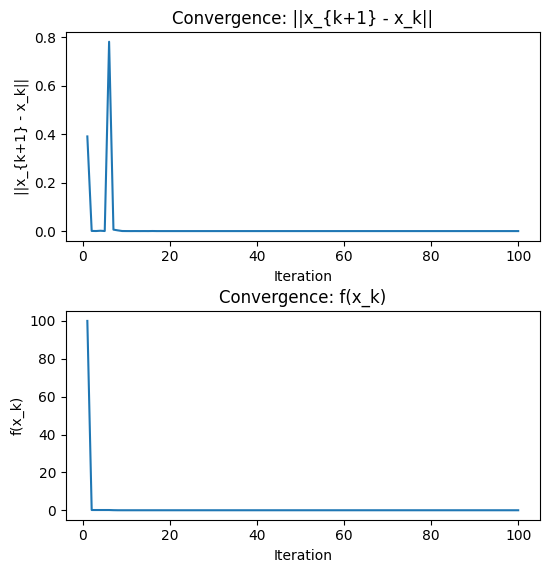

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_calls = {'f': 0, 'grad_f': 0, 'phi': 0, 'grad_phi':0}

def zoom(func, grad_func, x, p, alpha_lo, alpha_hi, c1=0.4, c2=0.9, max_iters=10):
    """
    Zoom operation for line search.

    Parameters:
    - func: Objective function.
    - grad_func: Gradient function.
    - x: Current point.
    - p: Search direction.
    - alpha_lo: Lower bound of the step length interval.
    - alpha_hi: Upper bound of the step length interval.
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """
    i = 0
    alpha0 =0
    while True:
        alpha_j = (alpha_lo + alpha_hi) / 2

        phi_fun_0 = func(x, p, 0.0)
        phi_fun_j = func(x, p, alpha_j)
        num_calls['phi'] += 2
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1


        if phi_fun_j > phi_fun_0 + c1 * alpha_j * grad_phi_fun_0 :
            alpha_hi = alpha_j
            # print(f'in zoom: {alpha_hi}')
        else:
            grad_phi_fun_j = grad_func(x, p, alpha_j)
            num_calls['grad_phi'] += 1

            if abs(phi_fun_j) <= - c2 * grad_phi_fun_0:
              alpha_star = alpha_j
              return alpha_star

            if grad_phi_fun_j * (alpha_hi - alpha_lo) >= 0:
                alpha_hi = alpha_lo

            alpha_lo = alpha_j
        i += 1

        # if i >= 15:
        #   return (alpha_lo + alpha_hi) / 2


def line_search_with_zoom(func, grad_func, x, p, alpha_init=0.0, alpha_max=100, c1=0.40, c2=0.90, max_iters=10):
    """
    Line search algorithm with zoom.

    Parameters:
    - func: phi_fun.
    - grad_func: grad_phi_fun.
    - x: Current point.
    - p: Search direction.
    - alpha_init: Initial step length (default: 1.0).
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations for the zoom operation (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """

    alpha_lo  = alpha_init
    alpha_i = (alpha_init + alpha_max) / 2
    alpha_im1 = 0.0
    # alpha_hi = alpha


    phi_fun_0 = func(x, p, 0.0)
    num_calls['phi'] += 1
    while True:

        phi_fun_i = func(x, p, alpha_i)
        num_calls['phi'] += 1
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1

        if phi_fun_i > phi_fun_0 + c1 * alpha_i * grad_phi_fun_0 :
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i, c1=0.4, c2=0.9)
            return alpha_star

        grad_phi_fun_i = grad_func(x, p, alpha_i)
        num_calls['grad_phi'] += 1
        if abs(phi_fun_i) <= -c2 * grad_phi_fun_0:
            alpha_star = alpha_i
            return alpha_star

        if grad_phi_fun_i >= 0:
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i , c1=0.4, c2=0.9)
            return alpha_star

        alpha_im1 = alpha_i
        alpha_i = (alpha_i + alpha_max) / 2

    return alpha_star



def optimization_algorithm(func, grad_func, initial_x, max_iters , f ):
    x = initial_x
    x_history = [x]
    f_history = [f(x)]
    convergence_norm_diff = []  # Initialize the list
    convergence_f = []

    for k in range(max_iters):
        # Perform optimization step
        x1, x2 = x
        p = grad_f(x)  # Compute search direction
        num_calls['grad_f'] += 1
        p = - p / np.linalg.norm(p)
        p1, p2 = p


        alpha = line_search_with_zoom(func, grad_func, x, p)  # Perform line search
        x_new = x + alpha * p  # Update iterate
        f_new = f(x_new)  # Evaluate objective function at new iterate
        num_calls['f'] += 1
        print(f'Iteration {k} | value Function: {f_new}')

        # Store convergence information
        x_history.append(x_new)
        f_history.append(f_new)
        convergence_norm_diff.append(np.linalg.norm(x_new - x))  # Append norm difference
        convergence_f.append(f_new)

        # Check termination condition
        x = x_new

    return x_history, f_history, convergence_norm_diff, convergence_f




def f(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2


def grad_f(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])



def phi_fun(x, p, alpha):
    x1, x2 = x
    p1, p2 = p
    return 100 * ((x2 + alpha * p2) - (x1 + alpha * p1)**2)**2 + (1 - (x1 + alpha * p1))**2


def grad_phi_fun(x, p, alpha):
    x1, x2 = x
    p1, p2 = p

    term1 = 2 * (x2 + alpha * p2 - (x1 + alpha * p1)**2) * (p2 - 2 * (x1 + alpha * p1) * p1)
    term2 = 2 * (1 - (x1 + alpha * p1)) * (-p1)

    grad_phi = 100*term1 + term2

    return grad_phi




# Example usage
#c1=0.4, c2=0.9
initial_x = np.array([1.0, 2.0])  # Initial point
max_iters = 100

x_history, f_history, convergence_norm_diff, convergence_f = optimization_algorithm(phi_fun, grad_phi_fun, initial_x, max_iters, f)

# Plot convergence
iterations = np.arange(1, len(convergence_norm_diff) + 1)  # Adjusted iterations

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout(pad=3.0)

ax[0].plot(iterations, convergence_norm_diff)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('||x_{k+1} - x_k||')
ax[0].set_title('Convergence: ||x_{k+1} - x_k||')

ax[1].plot(iterations, f_history[:-1])  # Adjusted for correct length
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('f(x_k)')
ax[1].set_title('Convergence: f(x_k)')

plt.show()


In [ ]:
num_calls

{'f': 100, 'grad_f': 100, 'phi': 3892, 'grad_phi': 2046}

In [ ]:
#np.linalg.norm()

## F2

Iteration 0 | value Function: 89.72283222954584
Iteration 1 | value Function: 57.927135965909585
Iteration 2 | value Function: 37.65978761558874
Iteration 3 | value Function: 14.69127492118251
Iteration 4 | value Function: 9.333077213095011
Iteration 5 | value Function: 7.6927895513720825
Iteration 6 | value Function: 5.689525142704843
Iteration 7 | value Function: 4.065596436023891
Iteration 8 | value Function: 2.8019138892158386
Iteration 9 | value Function: 2.5142356515873963
Iteration 10 | value Function: 2.387556959485055


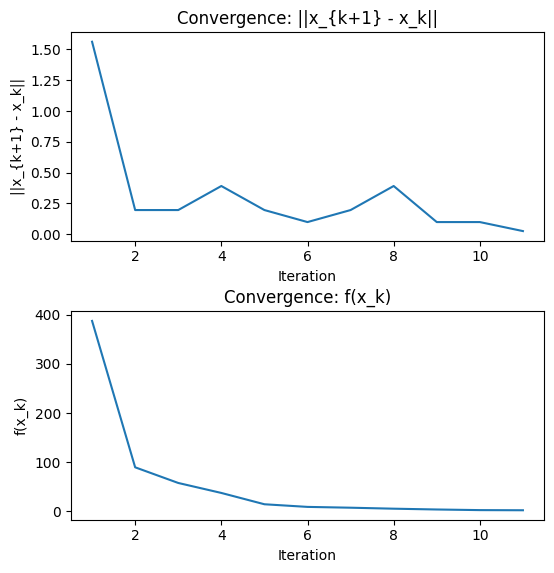

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_calls = {'f': 0, 'grad_f': 0, 'phi': 0, 'grad_phi':0}

def zoom(func, grad_func, x, p, alpha_lo, alpha_hi, c1=0.3, c2=0.9, max_iters=10):
    """
    Zoom operation for line search.

    Parameters:
    - func: Objective function.
    - grad_func: Gradient function.
    - x: Current point.
    - p: Search direction.
    - alpha_lo: Lower bound of the step length interval.
    - alpha_hi: Upper bound of the step length interval.
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """
    i = 0
    alpha0 =0
    while True:
        alpha_j = (alpha_lo + alpha_hi) / 2

        phi_fun_0 = func(x, p, 0.0)
        phi_fun_j = func(x, p, alpha_j)
        num_calls['phi'] += 2
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1


        if phi_fun_j > phi_fun_0 + c1 * alpha_j * grad_phi_fun_0 :
            alpha_hi = alpha_j
            # print(f'in zoom: {alpha_hi}')
        else:
            grad_phi_fun_j = grad_func(x, p, alpha_j)
            num_calls['grad_phi'] += 1

            if abs(phi_fun_j) <= - c2 * grad_phi_fun_0:
              alpha_star = alpha_j
              return alpha_star

            if grad_phi_fun_j * (alpha_hi - alpha_lo) >= 0:
                alpha_hi = alpha_lo

            alpha_lo = alpha_j
        i += 1

        # if i >= 15:
        #   return (alpha_lo + alpha_hi) / 2


def line_search_with_zoom(func, grad_func, x, p, alpha_init=0.0, alpha_max=100, c1=0.30, c2=0.90, max_iters=50):
    """
    Line search algorithm with zoom.

    Parameters:
    - func: phi_fun.
    - grad_func: grad_phi_fun.
    - x: Current point.
    - p: Search direction.
    - alpha_init: Initial step length (default: 1.0).
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations for the zoom operation (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """

    alpha_lo  = alpha_init
    alpha_i = (alpha_init + alpha_max) / 2
    alpha_im1 = 0.0
    # alpha_hi = alpha


    phi_fun_0 = func(x, p, 0.0)
    num_calls['phi'] += 1
    while True:

        phi_fun_i = func(x, p, alpha_i)
        num_calls['phi'] += 1
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1

        if phi_fun_i > phi_fun_0 + c1 * alpha_i * grad_phi_fun_0 :
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i, c1=0.3, c2=0.9)
            return alpha_star

        grad_phi_fun_i = grad_func(x, p, alpha_i)
        num_calls['grad_phi'] += 1
        if abs(phi_fun_i) <= -c2 * grad_phi_fun_0:
            alpha_star = alpha_i
            return alpha_star

        if grad_phi_fun_i >= 0:
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i , c1=0.3, c2=0.9)
            return alpha_star

        # alpha_lo = alpha
        # alpha = (alpha_lo + alpha_max) / 2
        alpha_im1 = alpha_i
        alpha_i = (alpha_i + alpha_max) / 2

    return alpha_star



def optimization_algorithm(func, grad_func, initial_x, max_iters , f ):
    x = initial_x
    x_history = [x]
    f_history = [f(x)]
    convergence_norm_diff = []  # Initialize the list
    convergence_f = []

    for k in range(max_iters):
        # Perform optimization step
        x1, x2, x3, x4 = x
        p = grad_f(x)  # Compute search direction
        num_calls['grad_f'] += 1
        p = - p / np.linalg.norm(p)
        p1, p2, p3, p4= p


        alpha = line_search_with_zoom(func, grad_func, x, p)  # Perform line search
        x_new = x + alpha * p  # Update iterate
        f_new = f(x_new)  # Evaluate objective function at new iterate
        num_calls['f'] += 1
        print(f'Iteration {k} | value Function: {f_new}')

        # Store convergence information
        x_history.append(x_new)
        f_history.append(f_new)
        convergence_norm_diff.append(np.linalg.norm(x_new - x))  # Append norm difference
        convergence_f.append(f_new)

        # Check termination condition
        x = x_new

    return x_history, f_history, convergence_norm_diff, convergence_f



import numpy as np

def f(x):
    x1, x2, x3, x4 = x
    return (x1 - 10 * x2)**2 + 5 * (x3 - x4)**2 + (x2 - 2 * x3)**4 + 10 * (x1 - x4)**4

def grad_f(x):
    x1, x2, x3, x4 = x
    df_dx1 = 2 * (x1 - 10 * x2) + 40 * (x1 - x4)**3
    df_dx2 = -20 * (x1 - 10 * x2) + 4 * (x2 - 2 * x3)**3
    df_dx3 = 10 * (x3 - x4) - 8 * (x2 - 2 * x3)**3
    df_dx4 = -10 * (x3 - x4) - 40 * (x1 - x4)**3
    return np.array([df_dx1, df_dx2, df_dx3, df_dx4])

def phi_fun(x, p, alpha):
    x1, x2, x3, x4 = x
    p1, p2, p3, p4 = p
    return ((x1 + alpha * p1) - 10 * (x2 + alpha * p2))**2 + \
           5 * (x3 + alpha * p3 - x4 - alpha * p4)**2 + \
           (x2 + alpha * p2 - 2 * (x3 + alpha * p3))**4 + \
           10 * (x1 + alpha * p1 - x4 - alpha * p4)**4

def grad_phi_fun(x, p, alpha):
    x1, x2, x3, x4 = x
    p1, p2, p3, p4 = p

    term1 = 2 * (x1 + alpha * p1 - 10 * (x2 + alpha * p2)) * (p1 - 10 * p2)
    term2 = 10 * (x2 + alpha * p2 - 2 * (x3 + alpha * p3))**3 * (p2 - 2 * p3)
    term3 = 10 * (x1 + alpha * p1 - x4 - alpha * p4)**3 * (p1 - p4)
    term4 = 5 * (x3 + alpha * p3 - x4 - alpha * p4) * (p3 - p4)

    grad_phi = term1 + term2 + term3 + term4

    return grad_phi





# Example usage
#c1=0.3, c2=0.9
initial_x = np.array([1.0, 2.0, 2.0, 2.0])  # Initial point
max_iters = 11

x_history, f_history, convergence_norm_diff, convergence_f = optimization_algorithm(phi_fun, grad_phi_fun, initial_x, max_iters, f)

# Plot convergence
iterations = np.arange(1, len(convergence_norm_diff) + 1)  # Adjusted iterations

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout(pad=3.0)

ax[0].plot(iterations, convergence_norm_diff)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('||x_{k+1} - x_k||')
ax[0].set_title('Convergence: ||x_{k+1} - x_k||')

ax[1].plot(iterations, f_history[:-1])  # Adjusted for correct length
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('f(x_k)')
ax[1].set_title('Convergence: f(x_k)')

plt.show()


In [ ]:
num_calls

In [ ]:
initial_x

array([1., 2., 2., 2.])

array([1., 2., 2., 2.])